In order to successfully complete this assignment you must do the required reading, watch the provided videos and complete all instructions.  The embedded survey form must be entirely filled out and submitted.  Students must come to class the next day prepared to discuss the material covered in this assignment. 

---


# PCA 22: CUDA Memory Tiling 

### Goals for today's pre-class assignment 

1. [Tiling](#Tiling)
2. [Transpose Example](#Transpose-Example)
3. [Assignment wrap up](#Assignment-wrap-up)




---
<a name=Tiling></a>
# 1. Tiling




A GPU does not do automatic memory caching like a CPU.  Instead you need to do all of work for memory management yourself.  The following video gives a brief overview of the concept of tiling.  

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("tGu5DyIlofY",width=640,height=360)

&#9989; **<font color=red>QUESTION:</font>** Which of the following two code snippets (foo or bar) would benefit from tiling?

```c++
__global__ void foo(flout d_out[], float d_A[], float d_B[], float d_C[], float d_D[], float d_E[], int N)
{
    int tid = threadIdx.x;
    int i = tid + blockIdx.x*blockDim.x;
    if (i < N)
        d_out[i] = (d_A[i] + d_[i] + d_C[i] + d_D[i] + d_E[i]) / 5.0;
}
```

```c++
__global__ void bar(flout d_out[], float d_in[], int N)
{
    int tid = threadIdx.x;
    int i = tid + blockIdx.x*blockDim.x;
    if (i < N)
        d_out[i] = (d_in[i-2] + d_in[i-1] + d_in[i] + d_in[i+1] + d_in[i+2]) / 5.0;
}
```          
           

&#9989; **<font color=red>QUESTION:</font>** Explain your answer to the above question.

Bar would benefit the most from tiling because in foo, each element of each array is only accessed one time when the unique thread accessing that index goes to grab its value. However, in the second function, the memory access overlaps between threads because each thread accesses the two spots before and after its index so for example, index 1 is accessed by thread 1, 2, 3, n-2 and n-1. Thus its accessed 5 times more than in the other example


---
<a name=Transpose-Example></a>
# 2. Matrix Transpose


The following video describes how you might improve the performace of matrix transpose using tiling.

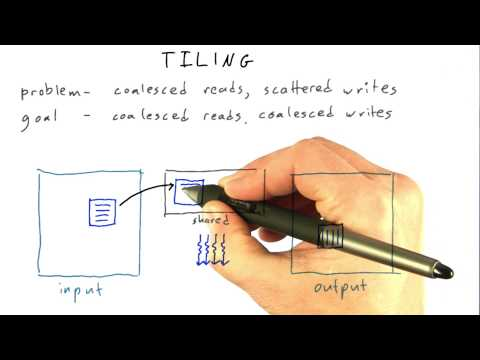

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("pP-1nJEp4Qc",width=640,height=360)

&#9989; **<font color=red>QUESTION:</font>** Explain why a matrix transpose is difficult to tile for large matrices.  Can you come up with any clever ways to get tiling to work? 

This becomes difficult with larger matrices because the K x K tile size becomes larger that wat is allowed for shared memory. To get around this we could maybe for a 2048 x 2048 matrix where we would use lets say a 64 x 64 chunk as the sectioning, we could use 4 32 x 32 chunks split across 4 SMs to represent the needed the section. A sort of heirarchal tiling. 



---
<a name=Assignment-wrap-up></a>
# 3. Assignment wrap up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credits for the assignment!**

[Direct Link to Survey Form](https://cmse.msu.edu/cmse401-pc-survey)


&#9989; **<font color=red>Assignment-Specific QUESTION:</font>**  No assignment specific question. 

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  Summarize what you did in this assignment.

We learned about tiling and when it is useful

&#9989; **<font color=red>QUESTION:</font>**  What questions do you have, if any, about any of the topics discussed in this assignment after working through the jupyter notebook?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  How well do you feel this assignment helped you to achieve a better understanding of the above mentioned topic(s)?

Very well

&#9989; **<font color=red>QUESTION:</font>** What was the **most** challenging part of this assignment for you? 

Thinking about how to get around the problem with transposing

&#9989; **<font color=red>QUESTION:</font>** What was the **least** challenging part of this assignment for you? 

Videos

&#9989; **<font color=red>QUESTION:</font>**  What kind of additional questions or support, if any, do you feel you need to have a better understanding of the content in this assignment?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  Do you have any further questions or comments about this material, or anything else that's going on in class?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** Approximately how long did this pre-class assignment take?

30 minutes

In [3]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse401-pc-survey" 
	width="100%" 
	height="500px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)



---------
### Congratulations, we're done!

To get credit for this assignment you must fill out and submit the above survey from on or before the assignment due date.

Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

----

----